## 1. Data exploration

Exploração dos dados baseado em:

- __281__ observações
- __7__ características 
- __2__ usuários distintos

### Get started

In [1]:
from data import get_full_data, get_who_is
from matplotlib import pyplot as plt
from sklearn import linear_model
from predicting_who_is import accuracy_score, performance_metric
import pandas as pd
import numpy as np

from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

X, Y, df = get_full_data()

df = df.sample(frac=1)

#X = df[df['user'] == 2][['rate_blink_left', 'rate_blink_right', 'rate_smile_or_not', 'blink_left', 'blink_right', 'smile_or_not']]
#Y = df[df['user'] == 2]['user']

#X = df[['blink_left', 'blink_right', 'smile_or_not']]
# Y = df['user']

Xdummies_df = pd.get_dummies(X)
Ydummies_df = Y

X = Xdummies_df.values
Y = Ydummies_df.values

# Print the first few entries of the RMS Titanic data
display(df.head(20))

/home/ocean/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,user,rate_blink_left,rate_blink_right,rate_smile_or_not,blink_left,blink_right,smile_or_not
144,2,0.17,0.17,0.70,1,1,1
439,2,0.75,0.60,0.00,0,0,0
324,2,0.77,0.57,0.00,0,0,0
326,2,0.91,0.86,0.00,0,0,0
483,2,0.75,0.60,0.00,0,0,0
309,2,0.82,0.62,0.00,0,0,0
607,1,0.99,0.65,0.00,0,0,0
666,1,0.81,0.63,0.00,0,0,0
700,1,0.99,0.86,0.38,0,0,1
313,2,0.76,0.83,0.47,0,0,1


### Create a function to analysing

In [2]:
# Investigar 
# http://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-classifier-in-an-svm-supervised-learning-model/
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
# http://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py
#http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
def display_points(X, Y):
    from sklearn.decomposition import PCA
    from sklearn import svm
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.cross_validation import train_test_split
    import pylab as pl
    import numpy as np
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
    pca = PCA(n_components=2).fit(X_train)
    pca_2d = pca.transform(X_train)
    svmClassifier_2d = svm.LinearSVC(random_state=0).fit(pca_2d, y_train)
    #clf = DecisionTreeClassifier().fit(pca_2d, y_train)
    for i in range(0, pca_2d.shape[0]):
        if y_train[i] == 1:
            c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c='r', s=50,marker='+')
        elif y_train[i] == 2:
            c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c='g', s=50,marker='o')
        elif y_train[i] == 3:
            c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c='b', s=50,marker='*')

    pl.legend([c1, c2], ['Thiago', 'Alessandro'])
    
    x_min, x_max = pca_2d[:, 0].min() - 1, pca_2d[:,0].max() + 1
    y_min, y_max = pca_2d[:, 1].min() - 1, pca_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))
    Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
    Z = Z.reshape(xx.shape)
    pl.contour(xx, yy, Z, alpha=0.8)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    pl.show()

    

###  Feature Observation

We are see the 6 features in dataset

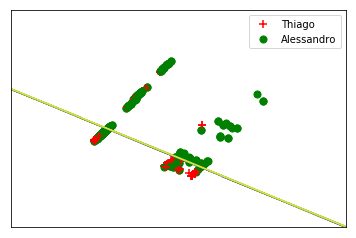

In [3]:
display_points(X, Y)

## 2. Developing a model

In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Shuffle and split data

For the code cell below, you will need to implement the following:

- Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.
    - Split the data into 80% training and 20% testing.
    - Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to X_train, X_test, y_train, and y_test.

In [4]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement

#### Algorithm OneVsRestClassifier

In [5]:
def model_1(resultados):
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.svm import LinearSVC
    modelo = OneVsRestClassifier(LinearSVC(random_state = 0))
    resultado = accuracy_score("OneVsRest", modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm OneVsOne

In [6]:
def model_2(resultados):
    from sklearn.multiclass import OneVsOneClassifier
    from sklearn.svm import LinearSVC
    modelo = OneVsOneClassifier(LinearSVC(random_state = 0))
    resultado = accuracy_score("OneVsOne", modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm MultinomialNB

In [7]:
def model_3(resultados):
    from sklearn.naive_bayes import MultinomialNB
    modelo = MultinomialNB()
    resultado = accuracy_score("MultinomialNB", modelo, X_train, y_train)

    resultados[resultado] = modelo 

#### Algorithm AdaBoostClassifier

In [8]:
def model_4(resultados):
    from sklearn.ensemble import AdaBoostClassifier
    modelo = AdaBoostClassifier()
    resultado = accuracy_score("AdaBoostClassifier", modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm LinearSVC

In [9]:
def model_5(resultados):
    from sklearn.svm import LinearSVC
    modelo = LinearSVC(random_state=0)
    resultado = accuracy_score('LinearSVC', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm SVC with Kernel Linear

In [10]:
def model_6(resultados):
    from sklearn.svm import SVC
    modelo = SVC(kernel='linear', C=0.025)
    resultado = accuracy_score('SVC with Kernel Linear', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm DecisionTreeClassifier

In [11]:
def model_7(resultados):
    from sklearn.tree import DecisionTreeClassifier
    modelo = DecisionTreeClassifier(random_state=0)
    resultado = accuracy_score('DecisionTreeClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorith OutputCodeClassifier

In [12]:
def model_8(resultados):
    from sklearn.multiclass import OutputCodeClassifier
    from sklearn.svm import LinearSVC
    modelo = OutputCodeClassifier(LinearSVC(random_state=0), code_size=2, random_state=0)
    resultado = accuracy_score('OutputCodeClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm GaussianProcessClassifier

In [13]:
def model_9(resultados):
    from sklearn.gaussian_process import GaussianProcessClassifier
    from sklearn.gaussian_process.kernels import RBF
    modelo = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
    resultado = accuracy_score('GaussianProcessClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm MLPClassifier

In [14]:
def model_10(resultados):
    from sklearn.neural_network import MLPClassifier
    modelo = MLPClassifier(alpha=1)
    resultado = accuracy_score('MLPClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm KNeighborsClassifier

In [15]:
def model_11(resultados):
    from sklearn.neighbors import KNeighborsClassifier
    modelo = KNeighborsClassifier(6)
    resultado = accuracy_score('KNeighborsClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm QuadraticDiscriminantAnalysis

In [16]:
def model_12(resultados):
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    modelo = QuadraticDiscriminantAnalysis()
    resultado = accuracy_score('QuadraticDiscriminantAnalysis', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm GaussianNB

In [17]:
def model_13(resultados):
    from sklearn.naive_bayes import GaussianNB
    modelo = GaussianNB()
    resultado = accuracy_score('GaussianNB', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm RBF SVM

In [18]:
def model_14(resultados):
    from sklearn.svm import SVC
    modelo = SVC(gamma=2, C=1)
    resultado = accuracy_score('RBF SVM', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Select the best algorithm

In [19]:
# Storage result of all algorithm and select the best
resultados = {}

# Create model 1
model_1(resultados)
# Create model 2
model_2(resultados)
# Create model 3
model_3(resultados)
# Create model 4
model_4(resultados)
# Create model 5
model_5(resultados)
# Create model 6
model_6(resultados)
# Create model 7
model_7(resultados)
# Create model 8
#model_8(resultados)
# Create model 9
#model_9(resultados)
# Create model 10
model_10(resultados)
# Create model 11
model_11(resultados)
# Create model 12
model_12(resultados)
# Create model 13
model_13(resultados)
# Create model 14
model_14(resultados)


performance_metric(resultados, X_train, X_test, y_train, y_test);

Taxa de acerto do OneVsRest: 83.66%
Taxa de acerto do OneVsOne: 83.66%
Taxa de acerto do MultinomialNB: 60.30%
Taxa de acerto do AdaBoostClassifier: 83.53%
Taxa de acerto do LinearSVC: 83.66%
Taxa de acerto do SVC with Kernel Linear: 71.06%
Taxa de acerto do DecisionTreeClassifier: 90.77%


/home/ocean/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Taxa de acerto do MLPClassifier: 83.78%
Taxa de acerto do KNeighborsClassifier: 82.92%
Taxa de acerto do QuadraticDiscriminantAnalysis: 81.41%
Taxa de acerto do GaussianNB: 74.06%
Taxa de acerto do RBF SVM: 84.16%
Taxa de acerto base: 51.74%

Vencedor:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

Taxa de acerto do algoritmo vencedor entre os algoritmos no mundo real : 94.03% 
Total de elementos : 1002


### Predicting who is

In [20]:
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
modelo = DecisionTreeClassifier(random_state=0)

X_who_is, Y_who_is, df = get_who_is()

#X_who_is = df[['blink_left', 'blink_right', 'smile_or_not']]

#print X_who_is

modelo.fit(X, Y)

predict = modelo.predict(X_who_is)

result = Counter(predict)

who_is = result.most_common()[0][0]

print result

if who_is == 1:
    msg = "Você parece ser o Thiago"
elif who_is == 2:
    msg = "Você parece ser o Alessandro"
elif who_is == 3:
    msg = "Você parece ser o Jonatha"
    
print msg

Counter({1: 115, 2: 86})
Você parece ser o Thiago
